In [105]:
from matplotlib import pyplot as plt
import pandas as pd

## Submissions

In [140]:
subs = pd.read_csv('../data/morocco/submissions_all.csv', low_memory=False)

# drop unnecessary columns
subs.drop(columns=['Unnamed: 0', 'media', 'media_embed', 'thumbnail'], inplace=True)

# delete rows with [deleted by user] or [ Removed by Reddit ] in title
subs = subs[subs['title'] != '[deleted by user]']
subs = subs[subs['title'] != '[ Removed by Reddit ]']
subs = subs[subs['title'] != '[image processing failed]']

# replace [deleted] and [removed] with Empty str in selftext and author
subs['selftext'] = subs['selftext'].replace(['[deleted]', '[removed]', 'Title', 'title'], '')
subs['title'] = subs['title'].replace(['[deleted]', '[removed]', 'Title', 'title'], '')
subs['author'] = subs['author'].replace('[deleted]', '')

# replace nan with Empty str in all columns
subs.fillna('', inplace=True)

# drop duplicates
subs.drop_duplicates(subset=['id'], inplace=True)
subs.reset_index(drop=True, inplace=True)

# change created_utc to datetime type
subs['created_utc'] = pd.to_datetime(subs['created_utc'])

# order by created_utc
subs.sort_values(by='created_utc', inplace=True)


In [66]:
subs

,id,author,author_flair_text,title,selftext,link_flair_text,created_utc,permalink,score,num_comments,over_18,hide_score
88836,83vri,taoufix,,Facebook is lost case [pic],,None,2009-03-11 18:24:44,/r/Morocco/comments/83vri/facebook_is_lost_cas...,3,3,False,False
88837,c6u7c,,,Rabat Agdal At Night,,None,2010-05-21 21:43:14,/r/Morocco/comments/c6u7c/rabat_agdal_at_night/,3,2,False,False
88838,c7162,taoufix,,Beach near Sidi Ifni at sunset [pic],,None,2010-05-22 15:53:13,/r/Morocco/comments/c7162/beach_near_sidi_ifni...,4,0,False,False
88839,c71ir,,,"Medina de Rabat on a hazy, lazy friday",,None,2010-05-22 16:43:48,/r/Morocco/comments/c71ir/medina_de_rabat_on_a...,3,1,False,False
88840,c727d,taoufix,,Tiznit traditional market street during lunch ...,,None,2010-05-22 18:11:18,/r/Morocco/comments/c727d/tiznit_traditional_m...,3,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
86640,1d3ofx4,penelopelouiseb,:snoo_smile: Visitor,Beautiful Asilah!,Some of my photos from Asilah! It was on my Mo...,:art: Art &amp; Photography,2024-05-29 22:22:27,/r/Morocco/comments/1d3ofx4/beautiful_asilah/,1,1,False,
86639,1d3ohin,Time-Ad-8776,:snoo_smile: Visitor,aliexpress fake airpods,can anyone recommend me chi fakes free shippin...,:technology: Science &amp; Tech,2024-05-29 22:24:24,/r/Morocco/comments/1d3ohin/aliexpress_fake_ai...,1,1,False,
86638,1d3orn3,PotentialOrder5837,:snoo_smile: Visitor,Sending money to yourself for vacation,Hi \nI plan to send myself around 50k dirhams ...,:travel: Travel,2024-05-29 22:37:01,/r/Morocco/comments/1d3orn3/sending_money_to_y...,1,1,False,
86646,1d3pnbc,Leather_Alfalfa6519,:snoo_smile: Visitor,is it too late to leave? do I actually leave o...,I’m a 26 (turning 26 next month) y.o female wi...,:Discussion: Discussion,2024-05-29 23:17:22,/r/Morocco/comments/1d3pnbc/is_it_too_late_to_...,1,1,False,


In [67]:
subs.to_csv('../data/cleaned/submissions.csv', index=False)

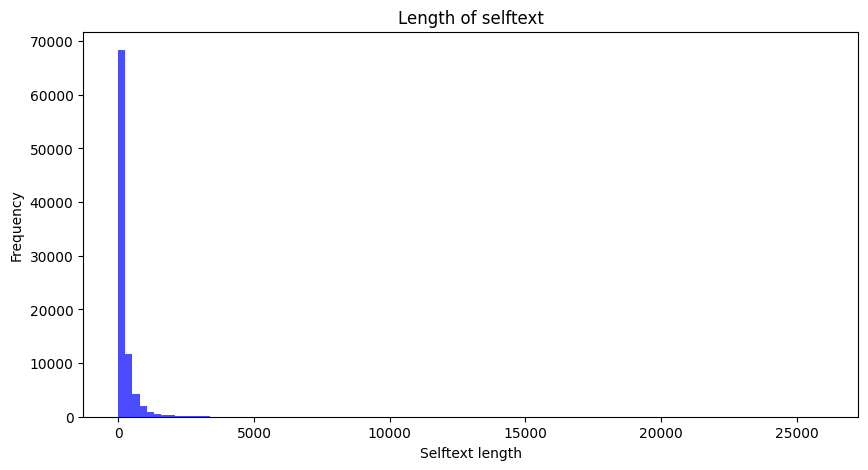

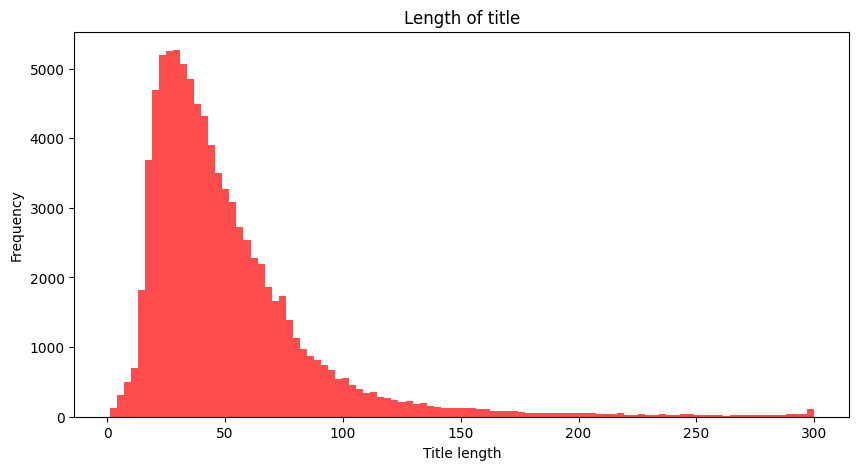

In [150]:
# length of selftext and title
subs['selftext_len'] = subs['selftext'].apply(len)
subs['title_len'] = subs['title'].apply(len)

# ignore empty selftext and title
subs2 = subs[subs['selftext_len'] > 0]
subs2 = subs[subs['title_len'] > 0]

# plot on separate graphs for better visualization
plt.figure(figsize=(10, 5))
plt.hist(subs2['selftext_len'], bins=100, color='blue', alpha=0.7)
plt.xlabel('Selftext length')
plt.ylabel('Frequency')
plt.title('Length of selftext')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(subs2['title_len'], bins=100, color='red', alpha=0.7)
plt.xlabel('Title length')
plt.ylabel('Frequency')
plt.title('Length of title')
plt.show()


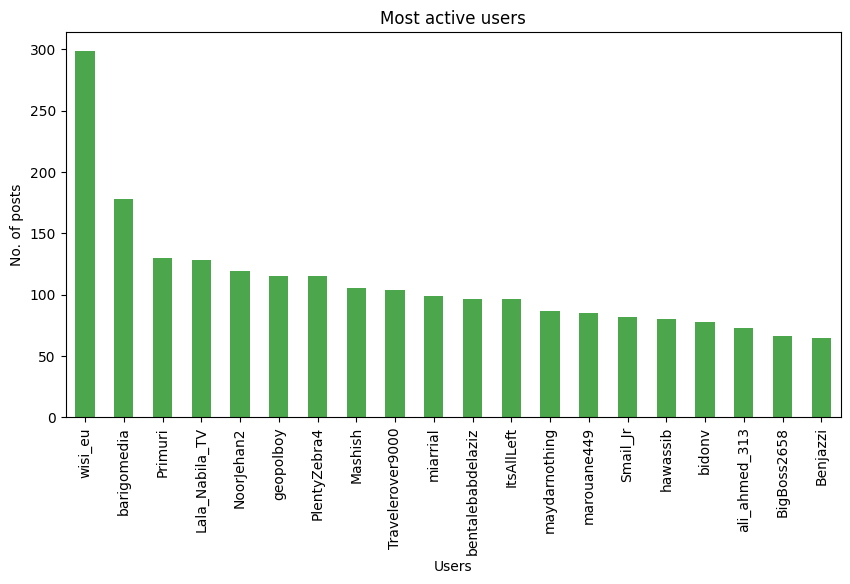

In [126]:
# most active users (authors) 
authors = subs['author'].value_counts()
authors = authors[authors.index != '']
authors = authors[authors.index != 'AutoModerator']
authors = authors[authors > 1]
authors = authors[:20]

plt.figure(figsize=(10, 5))
authors.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Users')
plt.ylabel('No. of posts')
plt.title('Most active users')
plt.show()

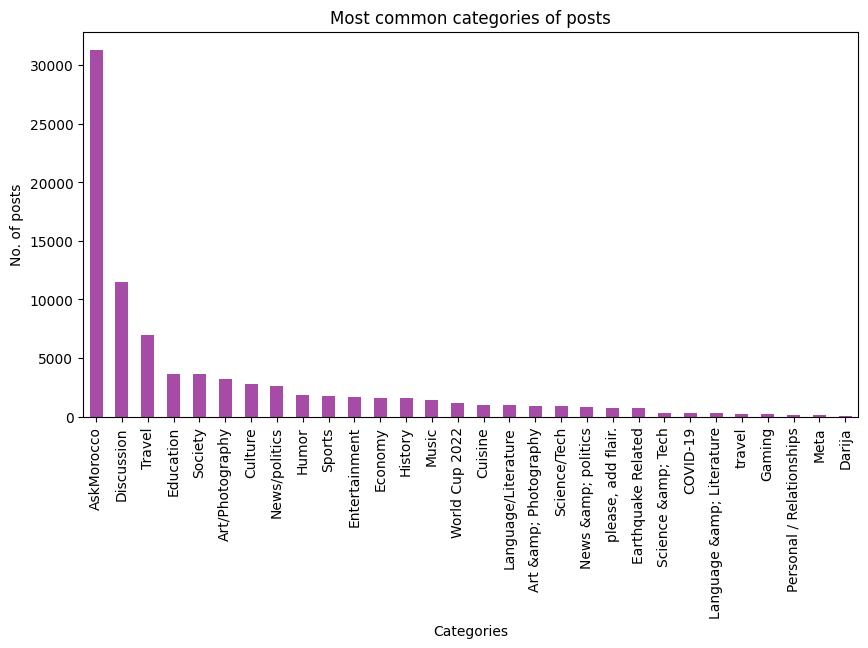

In [137]:
# most common categories (flairs)
subs['link_flair_text'] = subs['link_flair_text'].str.replace(':.*:', '', regex=True)
subs['link_flair_text'] = subs['link_flair_text'].str.strip()

flairs = subs['link_flair_text'].value_counts()
flairs = flairs[flairs.index != '' ]
flairs = flairs[flairs.index != 'None' ]
flairs = flairs[flairs > 1]
flairs = flairs[:30]

plt.figure(figsize=(10, 5))
flairs.plot(kind='bar', color='purple', alpha=0.7)
plt.xlabel('Categories')
plt.ylabel('No. of posts')
plt.title('Most common categories of posts')
plt.show()

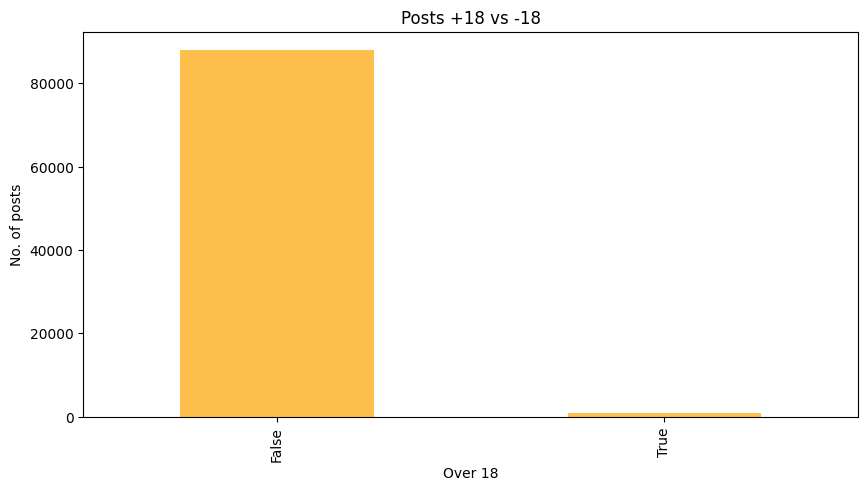

In [142]:
# posts over 18 vs under 18
over_18 = subs['over_18'].value_counts()

plt.figure(figsize=(10, 5))
over_18.plot(kind='bar', color='orange', alpha=0.7)
plt.xlabel('Over 18')
plt.ylabel('No. of posts')
plt.title('Posts +18 vs -18')
plt.show()

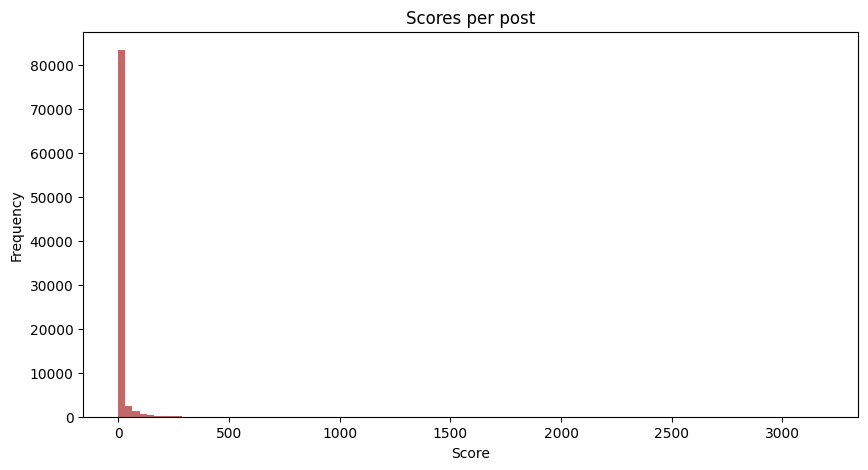

In [168]:
# scores per post
plt.figure(figsize=(10, 5))
plt.hist(subs['score'], bins=100, color='brown', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Scores per post')
plt.show()

## Comments

In [143]:
comments = pd.read_csv('../data/morocco/all_comments.csv', low_memory=False)

# drop unnecessary columns
comments.drop(columns=['Unnamed: 0', 'subreddit_id', 'subreddit'], inplace=True)

# replace [deleted] and [removed] with Empty str in author
comments['author'] = comments['author'].replace('[deleted]', None)

# remove AutoModerator comments
comments = comments[comments['author'] != 'AutoModerator']

# drop rows with [deleted] or [removed] in body
comments = comments[comments['body'] != '[deleted]']
comments = comments[comments['body'] != '[removed]']

# drop duplicates
comments.drop_duplicates(subset=['id'], inplace=True)
comments.reset_index(drop=True, inplace=True)

# change created_utc to datetime type
comments['created_utc'] = pd.to_datetime(comments['created_utc'])

# format link_id and parent_id to match submission id
comments['link_id'] = comments['link_id'].str.split('_').str[1]
comments['parent_id'] = comments['parent_id'].str.split('_').str[1]


In [103]:
comments.to_csv('../data/cleaned/comments.csv', index=False)

In [144]:
comments

,id,author,author_flair_text,body,created_utc,score,score_hidden,permalink,parent_id,link_id
0,c1b5ycc,Tarkaan,None,I don't know if Tilapia is something I'd be pr...,2011-01-02 18:14:52,1,False,NaN,c1b5wpw,eu48p
1,c1b5wpw,pirateddit,Casablanca,Modern retailers make a ton of positive things...,2011-01-02 18:02:44,2,False,NaN,eu48p,eu48p
2,c1b5vfm,pirateddit,Casablanca,Impressive. What's tmbo?,2011-01-02 17:52:28,1,False,NaN,euj94,euj94
3,c1bb328,pirateddit,Casablanca,Do you like hiking? [Ait Bougmez](http://lexic...,2011-01-03 21:30:12,1,False,NaN,ev6ru,ev6ru
4,c1bdbzd,pirateddit,Casablanca,"Concerning Ait Bougmez, I'm no expert but I fo...",2011-01-04 10:50:18,1,False,NaN,c1bca2m,ev6ru
...,...,...,...,...,...,...,...,...,...,...
1203987,j1plydj,Kastillex,:snoo_smile: Visitor,The closest word I can think of is yujazif mea...,2022-12-26 10:54:01,1,False,/r/Morocco/comments/zv0bpv/a_few_words_in_dari...,j1pkqq5,zv0bpv
1203988,j1pm2ik,Responsible_Taste_35,:snoo_smile: Visitor,I don’t think it’s idiotic to want to know whe...,2022-12-26 10:55:46,1,True,/r/Morocco/comments/zvk9uy/please_explain_the_...,j1ploev,zvk9uy
1203989,j1pm4aq,PuzzleheadedLynx5129,:snoo_smile: Visitor,I'm in too ! how can i join ?,2022-12-26 10:56:31,2,False,/r/Morocco/comments/zv8z9t/who_is_for_creating...,zv8z9t,zv8z9t
1203990,j1pm4cs,Corporate_Bankster,:MA_flag:,We both know that’s not the aim of this discou...,2022-12-26 10:56:33,1,True,/r/Morocco/comments/zvk9uy/please_explain_the_...,j1pm2ik,zvk9uy


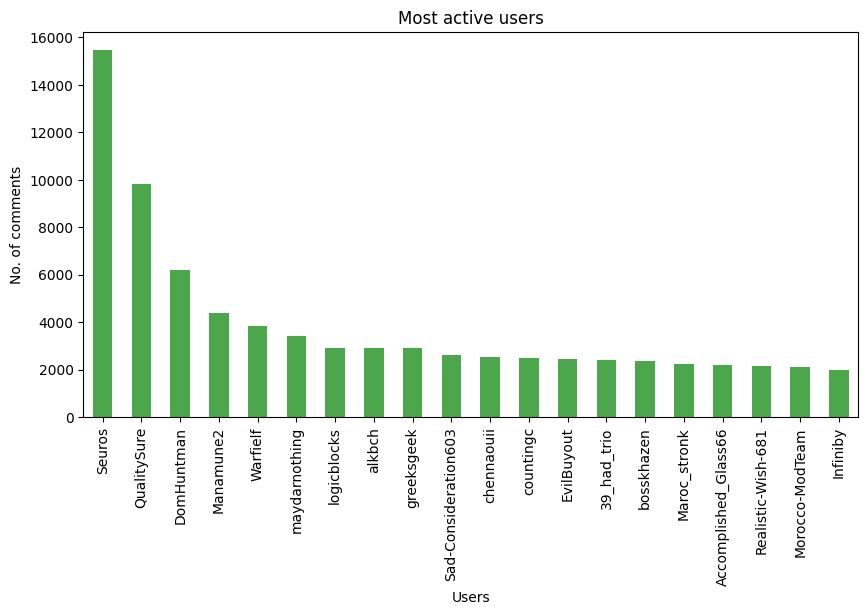

In [145]:
# most active users (authors)
authors = comments['author'].value_counts()
authors = authors[authors.index != '']
authors = authors[authors > 1]
authors = authors[:20]

plt.figure(figsize=(10, 5))
authors.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Users')
plt.ylabel('No. of comments')
plt.title('Most active users')
plt.show()

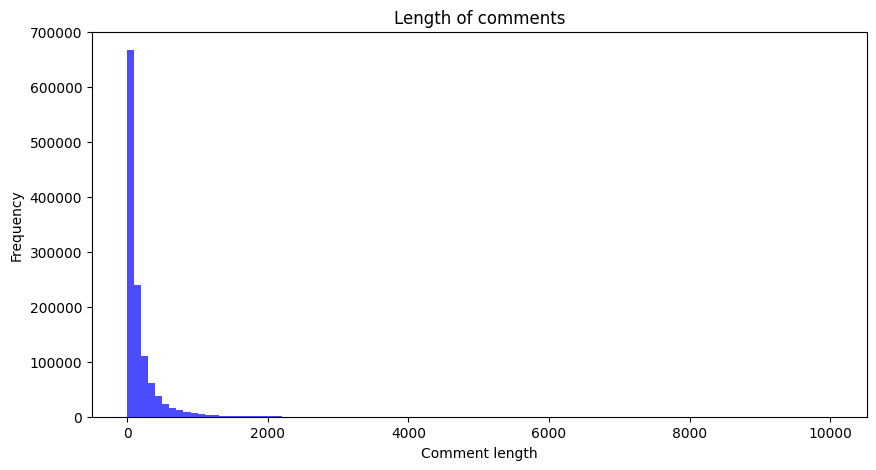

In [153]:
# length of comments
comments['body'] = comments['body'].astype(str)
comments['body_len'] = comments['body'].apply(len)
# dont output the comments with length 0
comments2 = comments[comments['body_len'] > 0]
plt.figure(figsize=(10, 5))
plt.hist(comments2['body_len'], bins=100, color='blue', alpha=0.7)
plt.xlabel('Comment length')
plt.ylabel('Frequency')
plt.title('Length of comments')
plt.show()

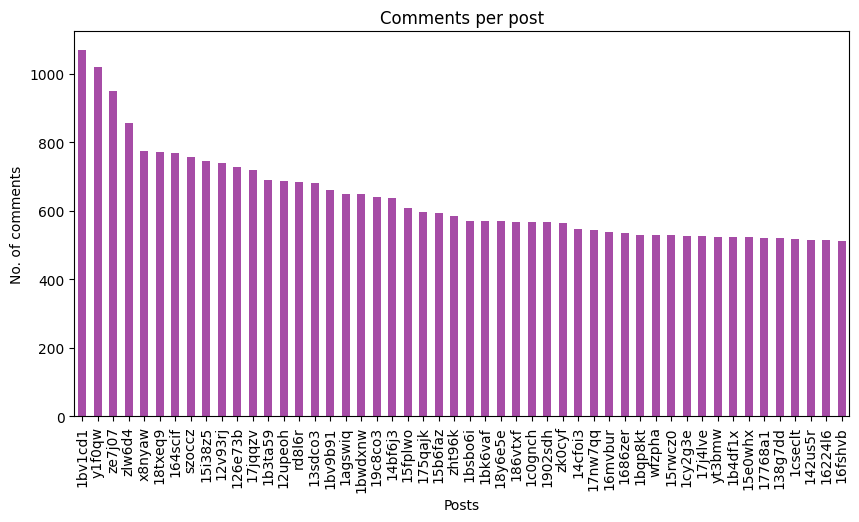

In [155]:
# comments per post
comments_per_post = comments['link_id'].value_counts()
comments_per_post = comments_per_post[comments_per_post > 1]
comments_per_post = comments_per_post[:50]

plt.figure(figsize=(10, 5))
comments_per_post.plot(kind='bar', color='purple', alpha=0.7)
plt.xlabel('Posts')
plt.ylabel('No. of comments')
plt.title('Comments per post')
plt.show()

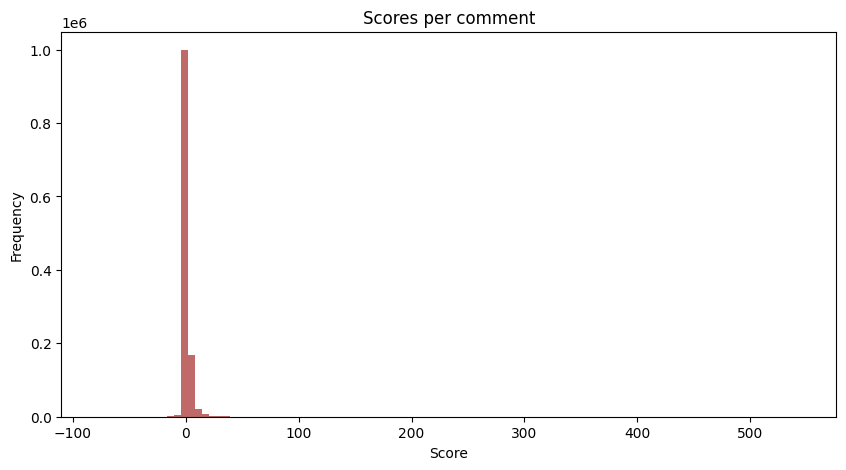

In [171]:
# scores per comment
plt.figure(figsize=(10, 5))
# remove outliers
plt.hist(comments['score'], bins=100, color='brown', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Scores per comment')
plt.show()
